In [1]:
from ultralytics import YOLO
from utils.unet import UNET
from utils.sba6pm import Vertebra as SBA

detectModule = YOLO("models/detect/weights.pt")
segmentModule = UNET("models/segment/aWtrA5sC++.pt", "cuda:0")
measureModule = SBA

In [2]:
import torch, cv2
import numpy as np
import importlib
from utils import system, smartdisplay
importlib.reload(system)
system = system.system(detectModule, segmentModule, measureModule, "cuda:0")

In [ ]:
from utils import dicom

filePathList = ["./image/27JJYP.dcm","./image/sample.dcm"]

for filePath in filePathList:
    dicom = dicom.DICOM("./image/27JJYP.dcm", "./image/dicom.jpg")



10  |  2  x  5


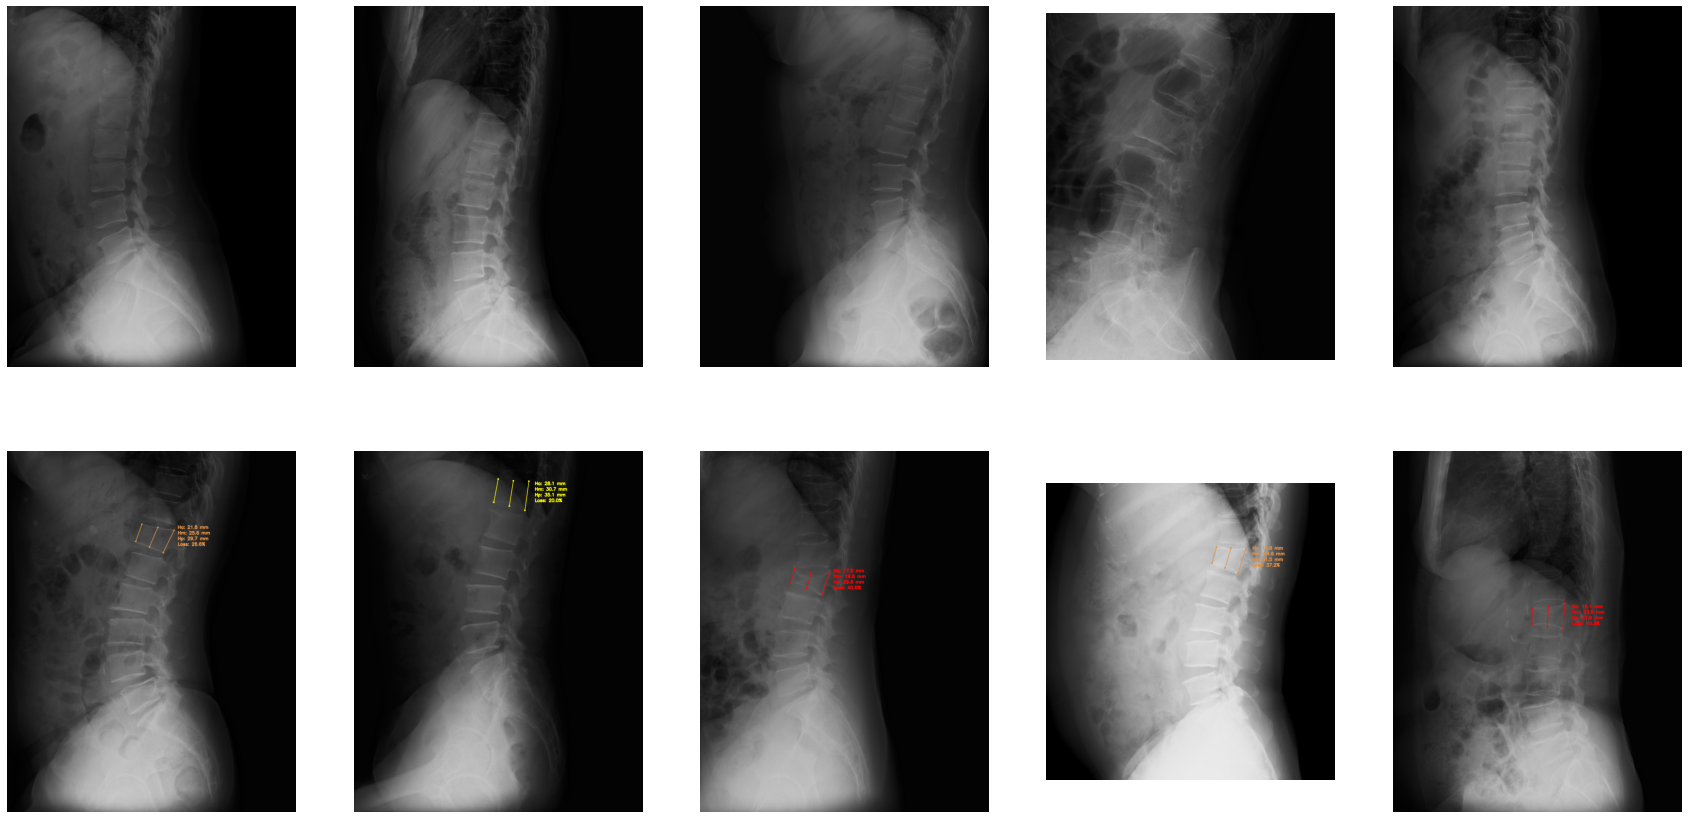

In [12]:
filePathList = np.array(
    ["input/test/0/10.jpg","input/test/0/1002.jpg","input/test/0/1036.jpg","input/test/0/105.jpg","input/test/0/1057.jpg"
    ,"input/test/1/1076.jpg","input/test/1/1115.jpg","input/test/1/1240.jpg","input/test/1/1256.jpg","input/test/1/1340.jpg"])
imageList = []
for filePath in filePathList:
    system.assess(filePath, visualise=True, flip = False)
    imageList.append(system.fracture)
smartdisplay.display(imageList, figsize=(30,15))